Ridge regression

# preprocessing normalization standardization and ridge regression

Best Ridge Alpha: {'alpha': 10}
Mean Squared Error (Best Ridge): 269.0704238573267


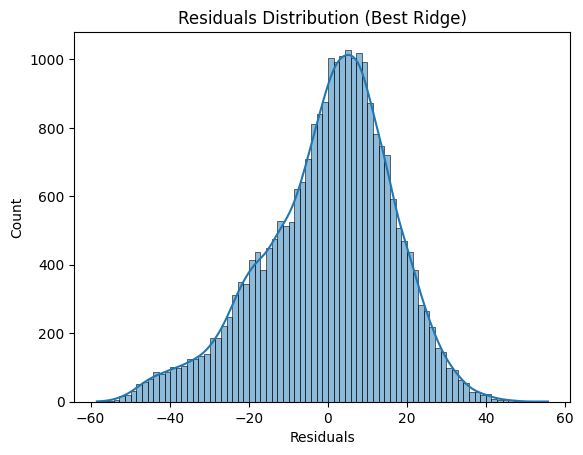

In [3]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('SpotifyFeatures.csv')

# Remove rows with null values in any column
data = data.dropna()

# Filter out rows where 'artist_name' is numerical
data = data[data['artist_name'].apply(lambda x: isinstance(x, str))]

# Reset index after removing rows
data = data.reset_index(drop=True)

# Select features and target variable
features = ['loudness', 'danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']
target = 'popularity'
X = data[features]
y = data[target]

# --- Outlier Removal ---
# Remove outliers by capping data within a reasonable range
# Create a mask to filter outliers and apply it to both X and y to keep them aligned
for feature in features:
    lower = X[feature].quantile(0.01)
    upper = X[feature].quantile(0.99)
    mask = (X[feature] >= lower) & (X[feature] <= upper)
    X = X[mask]
    y = y[mask]

# Reset index after removing rows
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardization ---
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Ridge Regression ---
# Hyperparameter Tuning for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10, 100, 1000]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best Ridge Model
best_ridge_model = ridge_grid.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)

print(f"Best Ridge Alpha: {ridge_grid.best_params_}")
print(f"Mean Squared Error (Best Ridge): {mse_best_ridge}")

# Residual Analysis
residuals = y_test - y_pred_best_ridge
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Best Ridge)')
plt.xlabel('Residuals')
plt.show()


# Preprocessing/Ridge regression

standerdized/normalized


# Preprocessing/Ridge regression/Parameter hyper tuning and cross validation


--- Ridge Regression ---
Mean Squared Error (Ridge): 269.0699096229603


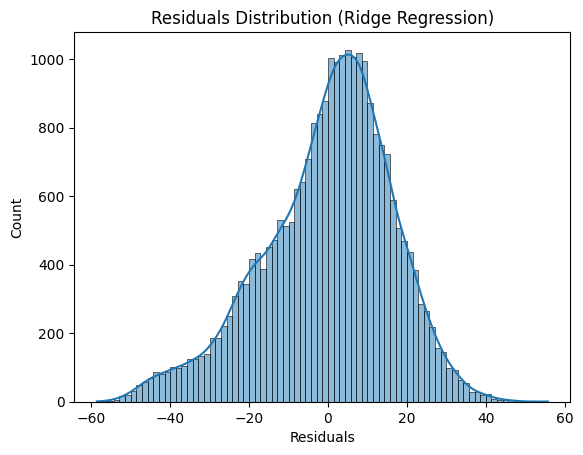


--- Cross-Validated MSE (Ridge): 268.6068708385143
Best Ridge Alpha: {'alpha': 10}
Mean Squared Error (Best Ridge): 269.0704238573267


In [4]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('SpotifyFeatures.csv')

# Remove rows with null values in any column
data = data.dropna()

# Filter out rows where 'artist_name' is numerical
data = data[data['artist_name'].apply(lambda x: isinstance(x, str))]

# Reset index after removing rows
data = data.reset_index(drop=True)

# Select features and target variable
features = ['loudness', 'danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']
target = 'popularity'
X = data[features]
y = data[target]

# --- Outlier Removal ---
# Remove outliers by capping data within a reasonable range
# Create a mask to filter outliers and apply it to both X and y to keep them aligned
for feature in features:
    lower = X[feature].quantile(0.01)
    upper = X[feature].quantile(0.99)
    mask = (X[feature] >= lower) & (X[feature] <= upper)
    X = X[mask]
    y = y[mask]

# Reset index after removing rows
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardization ---

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Ridge model
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"\n--- Ridge Regression ---")
print(f"Mean Squared Error (Ridge): {mse_ridge}")

# Residual Analysis (Ridge Regression)
residuals = y_test - y_pred_ridge
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Ridge Regression)')
plt.xlabel('Residuals')
plt.show()

# --- Cross-Validation ---
# Evaluate the Ridge model using cross-validation
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
mean_cv_mse = -cv_scores.mean()
print(f"\n--- Cross-Validated MSE (Ridge): {mean_cv_mse}")

# --- Hyperparameter Tuning ---

ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

best_ridge_model = ridge_grid.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
print(f"Best Ridge Alpha: {ridge_grid.best_params_}")
print(f"Mean Squared Error (Best Ridge): {mse_best_ridge}")


standardized/normalized/ridge

--- Standardized Data ---
Mean Squared Error (Standardized): 263.58995171543046
Coefficients (Standardized): [ 7.96448162  2.28297367 -4.25801453 -3.44520852 -0.31638611  0.76285875]
Intercept (Standardized): 44.723987846704446


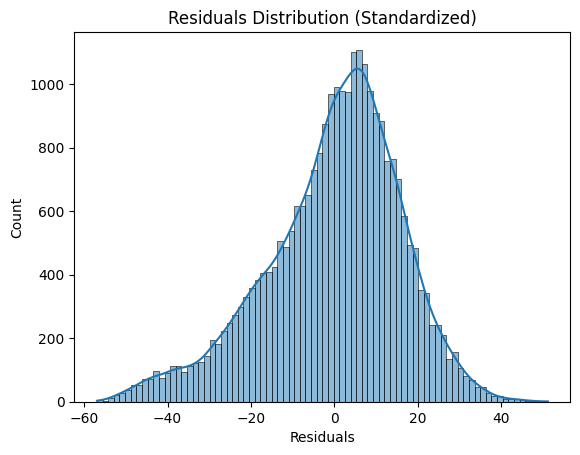


--- Ridge Regression (Standardized) ---
Mean Squared Error (Ridge): 263.58996834927854
Coefficients (Ridge): [ 7.96416487  2.28300651 -4.25764661 -3.44510631 -0.31638538  0.7628406 ]
Intercept (Ridge): 44.723987846704446

--- Cross-Validated MSE (Ridge): 262.91296792956945

--- Normalized Data ---
Mean Squared Error (Normalized): 263.58995171543046
Coefficients (Normalized): [ 47.93284125  10.60224435 -17.00051028 -10.28413344  -1.38591346
   5.32810876]
Intercept (Normalized): 13.993978044140679


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('SpotifyFeatures.csv')

# Remove rows with null values in any column
data = data.dropna()

# Filter out rows where 'artist_name' is numerical
data = data[data['artist_name'].apply(lambda x: isinstance(x, str))]

# Reset index after removing rows
data = data.reset_index(drop=True)

# Select features and target variable
features = ['loudness', 'danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']
target = 'popularity'
X = data[features]
y = data[target]

# --- Outlier Removal ---
# Remove outliers by capping data within a reasonable range
# Create a mask to filter outliers and apply it to both X and y to keep them aligned
for feature in features:
    lower = X[feature].quantile(0.01)
    upper = X[feature].quantile(0.99)
    mask = (X[feature] >= lower) & (X[feature] <= upper)
    X = X[mask]
    y = y[mask]

# Reset index after removing rows
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardization ---

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model with standardized data
model_standardized = LinearRegression()
model_standardized.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model (Standardized)
y_pred_standardized = model_standardized.predict(X_test_scaled)
mse_standardized = mean_squared_error(y_test, y_pred_standardized)

print(f"--- Standardized Data ---")
print(f"Mean Squared Error (Standardized): {mse_standardized}")
print(f"Coefficients (Standardized): {model_standardized.coef_}")
print(f"Intercept (Standardized): {model_standardized.intercept_}")

# Residual Analysis (Standardized)
residuals = y_test - y_pred_standardized
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Standardized)')
plt.xlabel('Residuals')
plt.show()

# --- Regularization with Ridge Regression ---
# Create and train the Ridge Regression model with standardized data
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Ridge model
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"\n--- Ridge Regression (Standardized) ---")
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Coefficients (Ridge): {ridge.coef_}")
print(f"Intercept (Ridge): {ridge.intercept_}")

# --- Cross-Validation ---
# Evaluate the Ridge model using cross-validation
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
mean_cv_mse = -cv_scores.mean()
print(f"\n--- Cross-Validated MSE (Ridge): {mean_cv_mse}")

# --- Normalization ---

# Normalize the features
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Create and train the linear regression model with normalized data
model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train)

# Make predictions and evaluate the model (Normalized)
y_pred_normalized = model_normalized.predict(X_test_normalized)
mse_normalized = mean_squared_error(y_test, y_pred_normalized)

print(f"\n--- Normalized Data ---")
print(f"Mean Squared Error (Normalized): {mse_normalized}")
print(f"Coefficients (Normalized): {model_normalized.coef_}")
print(f"Intercept (Normalized): {model_normalized.intercept_}")


# Mean Absolute Error and R sqaured Calculation

Mean Absolute error and R squared

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score


# Mean Absolute Error (Standardized)
mae_standardized = mean_absolute_error(y_test, y_pred_standardized)
# R squared (Standardized)
r2_standardized = r2_score(y_test, y_pred_standardized)

print(f"\n--- Standardized Data Evaluation ---")
print(f"Mean Squared Error (Standardized): {mse_standardized}")
print(f"Mean Absolute Error (Standardized): {mae_standardized}")
print(f"R squared (Standardized): {r2_standardized}")

# --- Ridge Regression Evaluation ---

# Mean Absolute Error (Ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
# R squared (Ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n--- Ridge Regression Evaluation ---")
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Mean Absolute Error (Ridge): {mae_ridge}")
print(f"R squared (Ridge): {r2_ridge}")

# --- Normalized Data Evaluation ---

# Mean Absolute Error (Normalized)
mae_normalized = mean_absolute_error(y_test, y_pred_normalized)
# R squared (Normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)

print(f"\n--- Normalized Data Evaluation ---")
print(f"Mean Squared Error (Normalized): {mse_normalized}")
print(f"Mean Absolute Error (Normalized): {mae_normalized}")
print(f"R squared (Normalized): {r2_normalized}")



--- Standardized Data Evaluation ---
Mean Squared Error (Standardized): 263.58995171543046
Mean Absolute Error (Standardized): 12.675447167824448
R squared (Standardized): 0.2108033899539371

--- Ridge Regression Evaluation ---
Mean Squared Error (Ridge): 263.58996834927854
Mean Absolute Error (Ridge): 12.675451983921086
R squared (Ridge): 0.21080334015167246

--- Normalized Data Evaluation ---
Mean Squared Error (Normalized): 263.58995171543046
Mean Absolute Error (Normalized): 12.675447167824448
R squared (Normalized): 0.2108033899539371
